# CIE4140_Lecture_13_Part_1_Python #

## Consider the steady-state vibrations of a string subjected to distributed viscous damping under a harmonic force ##

In [1]:
import sympy as sp

We represent the harmonic time-dependence by $e^{i \Omega t}$. The real part of the response to this load will give the response to the corresponding cosinusoidal load , whereas the imaginary part will give the response to the corresponding sinusoidal load

Let us write the equation of motion

In [2]:
w = sp.symbols('w',cls=sp.Function)
q1 = sp.symbols('q1',cls=sp.Function,real=True)
x,t = sp.symbols('x t',real=True)
nd, c, Omega= sp.symbols('nd c Omega',real=True)

In [3]:
EQM = sp.diff(w(x,t),t,2) + 2 * nd * sp.diff(w(x,t),t) - c**2 * sp.diff(w(x,t),x,2) - q1(x)*sp.exp(sp.I*Omega*t)
display(EQM)

-c**2*Derivative(w(x, t), (x, 2)) + 2*nd*Derivative(w(x, t), t) - q1(x)*exp(I*Omega*t) + Derivative(w(x, t), (t, 2))

We search for the steady-state solution in the form:

In [4]:
W = sp.symbols('W',cls=sp.Function)
w_form = W(x) * sp.exp(sp.I * Omega * t)

Substitution of this equation in the equation of motion gives:

In [5]:
EQM_fr = sp.simplify(EQM.subs(w(x,t),w_form))
display(EQM_fr)

-Omega**2*W(x)*exp(I*Omega*t) + 2*I*Omega*nd*W(x)*exp(I*Omega*t) - c**2*exp(I*Omega*t)*Derivative(W(x), (x, 2)) - q1(x)*exp(I*Omega*t)

$e^{i \Omega t}$ is not dropped, so can dropped manually, not necessary:

In [6]:
display(EQM_fr.subs(sp.exp(sp.I * Omega * t),1))

-Omega**2*W(x) + 2*I*Omega*nd*W(x) - c**2*Derivative(W(x), (x, 2)) - q1(x)

Let us find the soluton to this equation that satisfies the boundary conditions of a fixed-fixed string

In [7]:
L = sp.symbols('L')
W_sol = sp.dsolve(EQM_fr,W(x),ics={W(0):0,W(L):0}).rhs
display(W_sol)

(-exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c)*Integral(q1(L)*exp(-L*sqrt(-Omega**2 + 2*I*Omega*nd)/c), L)/(2*c*sqrt(-Omega**2 + 2*I*Omega*nd)*exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c) - 2*c*sqrt(-Omega**2 + 2*I*Omega*nd)) + exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c)*Integral(q1(x)*exp(-x*sqrt(-Omega**2 + 2*I*Omega*nd)/c), (x, 0))/(2*c*sqrt(-Omega**2 + 2*I*Omega*nd)*exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c) - 2*c*sqrt(-Omega**2 + 2*I*Omega*nd)) - exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c)*Integral(q1(x)*exp(x*sqrt(-Omega**2 + 2*I*Omega*nd)/c), (x, 0))/(2*c*sqrt(-Omega**2 + 2*I*Omega*nd)*exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c) - 2*c*sqrt(-Omega**2 + 2*I*Omega*nd)) + Integral(q1(L)*exp(L*sqrt(-Omega**2 + 2*I*Omega*nd)/c), L)/(2*c*sqrt(-Omega**2 + 2*I*Omega*nd)*exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c) - 2*c*sqrt(-Omega**2 + 2*I*Omega*nd)))*exp(-x*sqrt(Omega*(-Omega + 2*I*nd))/c) + (exp(2*L*sqrt(-Omega**2 + 2*I*Omega*nd)/c)*Integral(q1(L)*exp(-L*sqrt(-Omega**2 + 2*I*Omega*nd)/c), L)/(2*c*sqr

We introduce numerical values for the parameters

In [8]:
W_sol = W_sol.subs([(L,1),(c,2),(nd,1/2)])
display(W_sol)

(-exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(q1(L)*exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(q1(x)*exp(-x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) - exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(q1(x)*exp(x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + Integral(q1(L)*exp(L*sqrt(-Omega**2 + 1.0*I*Omega)/2), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)))*exp(-x*sqrt(Omega*(-Omega + 1.0*I))/2) + (exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(q1(L)*exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-O

Let us consider two different shapes of the exernal force:

In [9]:
q1_second_normal_mode = sp.sin(2 * sp.pi * x / 1)
q1_arbitrary = 14.39 * x **5 * (x - 1)
q1_constant = 1

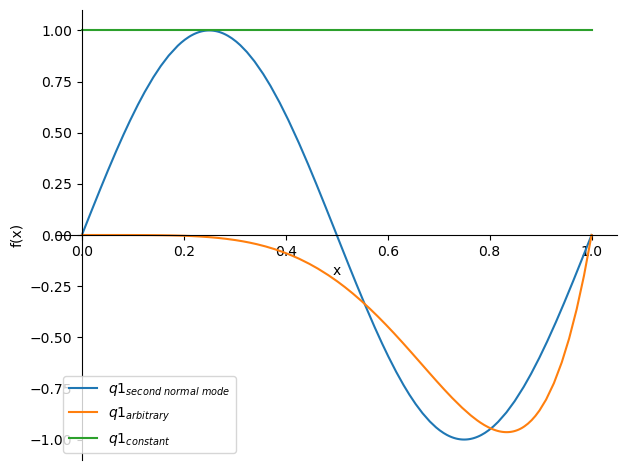

In [10]:
p0 = sp.plotting.plot(q1_second_normal_mode, (x, 0, 1),label='$q1_{second\ normal\ mode}$'    ,legend=True,show=False)
p1 = sp.plotting.plot(q1_arbitrary         , (x, 0, 1),label='$q1_{arbitrary}$' ,show=False)
p2 = sp.plotting.plot(q1_constant          , (x, 0, 1),label='$q1_{constant}$'  ,show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

In [11]:
W_to_second_normal_mode = W_sol.subs(q1(x),q1_second_normal_mode).subs(q1(L),q1_second_normal_mode.subs(x,L)).subs(q1(0),q1_second_normal_mode.subs(x,0))
display(W_to_second_normal_mode)
W_to_arbitrary = W_sol.subs(q1(x),q1_arbitrary).subs(q1(L),q1_second_normal_mode.subs(x,L)).subs(q1(0),q1_second_normal_mode.subs(x,0))
display(W_to_arbitrary)
W_to_constant = W_sol.subs(q1(x),q1_constant).subs(q1(L),q1_second_normal_mode.subs(x,L)).subs(q1(0),q1_second_normal_mode.subs(x,0))
display(W_to_constant)

(-exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-x*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*x), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) - exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(x*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*x), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + Integral(exp(L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)))*exp(-x*sqrt(Omega*(-Omega + 1.0*I))/2) + (exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega*

(-exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(14.39*x**5*(x - 1)*exp(-x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) - exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(14.39*x**5*(x - 1)*exp(x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + Integral(exp(L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)))*exp(-x*sqrt(Omega*(-Omega + 1.0*I))/2) + (exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*ex

(-exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) - exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(x*sqrt(-Omega**2 + 1.0*I*Omega)/2), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + Integral(exp(L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)))*exp(-x*sqrt(Omega*(-Omega + 1.0*I))/2) + (exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*s

Let us animate the reponses to these two loads assuming that the time-depandence is sinusoidal and introducing a numerical value of the load frequency: $\Omega=5$

In [12]:
W_to_second_normal_mode_sin = sp.im(W_to_second_normal_mode*sp.exp(sp.I*Omega*t)).subs(Omega,5)
W_to_arbitrary_sin = sp.im(W_to_arbitrary*sp.exp(sp.I*Omega*t)).subs(Omega,5)
W_to_constant_sin = sp.im(W_to_constant*sp.exp(sp.I*Omega*t)).subs(Omega,5)

In [13]:
display(W_to_second_normal_mode_sin.subs([(x,0.25),(t,3)]).evalf())

0.829017160665234*re(Integral(exp(L*sqrt(-25 + 5.0*I)/2)*sin(2*pi*L), (L, 1))/(-4*sqrt(-25 + 5.0*I) + 4*sqrt(-25 + 5.0*I)*exp(sqrt(-25 + 5.0*I)))) - 0.0849116508438914*re(Integral(exp(-x*sqrt(-25 + 5.0*I)/2)*sin(2*pi*x), (x, 0))/(-4*sqrt(-25 + 5.0*I) + 4*sqrt(-25 + 5.0*I)*exp(sqrt(-25 + 5.0*I)))) + 0.0849116508438914*re(Integral(exp(x*sqrt(-25 + 5.0*I)/2)*sin(2*pi*x), (x, 0))/(-4*sqrt(-25 + 5.0*I) + 4*sqrt(-25 + 5.0*I)*exp(sqrt(-25 + 5.0*I)))) + 0.162571960039279*re(exp(-0.125*sqrt(-25 + 5.0*I))*Integral(exp(x*sqrt(-25 + 5.0*I)/2)*sin(2*pi*x), (x, 0.25))/sqrt(-25 + 5.0*I)) - 0.162571960039279*re(exp(0.125*sqrt(-25 + 5.0*I))*Integral(exp(-x*sqrt(-25 + 5.0*I)/2)*sin(2*pi*x), (x, 0.25))/sqrt(-25 + 5.0*I)) - 0.829017160665234*re(exp(sqrt(-25 + 5.0*I))*Integral(exp(-L*sqrt(-25 + 5.0*I)/2)*sin(2*pi*L), (L, 1))/(-4*sqrt(-25 + 5.0*I) + 4*sqrt(-25 + 5.0*I)*exp(sqrt(-25 + 5.0*I)))) + 0.913928811509126*re(exp(sqrt(-25 + 5.0*I))*Integral(exp(-x*sqrt(-25 + 5.0*I)/2)*sin(2*pi*x), (x, 0))/(-4*sqrt(-2

In [14]:
W_to_second_normal_mode_sin_func = sp.lambdify((x,t),W_to_second_normal_mode_sin)
W_to_arbitrary_sin_func = sp.lambdify((x,t),W_to_arbitrary_sin)
W_to_constant_sin_func = sp.lambdify((x,t),W_to_constant_sin)

NotImplementedError: Only definite integrals are supported

Integral cannot be evaluated numerically, see `CIE4140_Lecture_13_Part_1_Python_seperate_q`

Now we plot the amplitude-frequency response functions at two locations along the string for the two load shapes

In [121]:
AFRF_second_normal_mode = sp.Abs(W_to_second_normal_mode.subs(x,3/4))
display(AFRF_second_normal_mode.evalf())

Abs((-exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-x*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*x), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) - exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(x*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*x), (x, 0))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)) + Integral(exp(L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-Omega**2 + 1.0*I*Omega)) - 4*sqrt(-Omega**2 + 1.0*I*Omega)))*exp(-0.375*sqrt(Omega*(-Omega + 1.0*I))) + (exp(sqrt(-Omega**2 + 1.0*I*Omega))*Integral(exp(-L*sqrt(-Omega**2 + 1.0*I*Omega)/2)*sin(2*pi*L), (L, 1))/(4*sqrt(-Omega**2 + 1.0*I*Omega)*exp(sqrt(-

AFRF can neither be evaluated